# Case study of corona virus outbreak in china

In [1]:
import math, requests

import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import datetime
import pytz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
plt.style.use('fivethirtyeight')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#training_data = pd.read_csv('corona_27.csv')
training_data = pd.read_csv('who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv')


In [3]:
training_data = training_data.fillna(value=0)
training_data.head()

,Province/States,Country/Region,WHO region,1/21/2020,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020
0,Confirmed,Globally,0,282.0,314.0,581.0,846.0,1320.0,2014.0,2798.0,4593.0,6065.0,7818.0,9826.0,11953.0,14557.0,17391.0,20630.0,24554.0,28276.0,31481.0,34886.0,37558.0,40554.0,43103.0,45171.0,46997.0,49053.0,50580.0,51857.0,71429.0,73332.0,75204.0,75748.0,76769.0,77794.0,78811.0,79331.0,80239.0,81109.0,82294.0,83652.0,85403.0,87137.0,88948.0,90870.0,93091.0,95324,98192.0,101927.0,105586.0,109577.0,113702.0,118319.0,125048.0,132758.0,142539.0,153517.0,167515.0,179111.0,191127.0,209839.0,234073.0,266073.0
1,Deaths,Globally,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7426.0,7807.0,8778.0,9840.0,11184.0
2,Confirmed,China,Western Pacific Region,278.0,309.0,571.0,830.0,1297.0,1985.0,2741.0,4537.0,5997.0,7736.0,9720.0,11821.0,14411.0,17238.0,20471.0,24363.0,28060.0,31211.0,34598.0,37251.0,40235.0,42708.0,44730.0,46550.0,48548.0,50054.0,51174.0,70635.0,72528.0,74280.0,74675.0,75569.0,76392.0,77042.0,77262.0,77780.0,78191.0,78630.0,78961.0,79394.0,79968.0,80174.0,80304.0,80422.0,80565,80711.0,80813.0,80859.0,80904.0,80924.0,80955.0,80981.0,80991.0,81021.0,81048.0,81077.0,81116.0,81116.0,81174.0,81300.0,81416.0
3,Confirmed,Outside of China,0,4.0,5.0,10.0,16.0,23.0,29.0,57.0,56.0,68.0,82.0,106.0,132.0,146.0,153.0,159.0,191.0,216.0,270.0,288.0,307.0,319.0,395.0,441.0,447.0,505.0,526.0,683.0,794.0,804.0,924.0,1073.0,1200.0,1402.0,1769.0,2069.0,2459.0,2918.0,3664.0,4691.0,6009.0,7169.0,8774.0,10566.0,12669.0,14759,17481.0,21110.0,24727.0,28673.0,32778.0,37364.0,44067.0,51767.0,61518.0,72469.0,86438.0,97995.0,110011.0,128665.0,152773.0,184657.0
4,Deaths,China,Western Pacific Region,0.0,0.0,0.0,0.0,0.0,0.0,80.0,106.0,132.0,170.0,213.0,259.0,304.0,361.0,425.0,491.0,564.0,637.0,723.0,812.0,909.0,1017.0,1114.0,1260.0,1381.0,1524.0,1666.0,1772.0,1870.0,2006.0,2121.0,2239.0,2348.0,2445.0,2595.0,2666.0,2718.0,2747.0,2791.0,2838.0,2873.0,2915.0,2946.0,2984.0,3015,3045.0,3073.0,3100.0,3123.0,3140.0,3162.0,3173.0,4955.0,3194.0,3204.0,3218.0,3231.0,3231.0,3242.0,3253.0,3261.0


In [133]:
#training_data.columns

In [5]:
#training_data.loc[:,'2/1/2020': '2/29/2020']

In [6]:
#is_china = training_data['Province/States']=='Confirmed'
#training_data[is_china].sum()

In [7]:
transpose_df = training_data.T
#transpose_df.head()

In [8]:
keep_col = [0,1,2,4]
df = transpose_df[keep_col]
df = df.rename(columns={0:'conf_glob', 1:'dea_glob', 2:'conf_china', 4:'dea_china'})
df = df.drop(['Province/States', 'Country/Region', 'WHO region'])

In [60]:
df

,conf_glob,dea_glob,conf_china,dea_china
1/21/2020,282,0,278,0
1/22/2020,314,0,309,0
1/23/2020,581,0,571,0
1/24/2020,846,0,830,0
1/25/2020,1320,0,1297,0
1/26/2020,2014,0,1985,0
1/27/2020,2798,0,2741,80
1/28/2020,4593,0,4537,106
1/29/2020,6065,0,5997,132
1/30/2020,7818,0,7736,170


In [134]:
df1 = df.T
#df1

# week-1

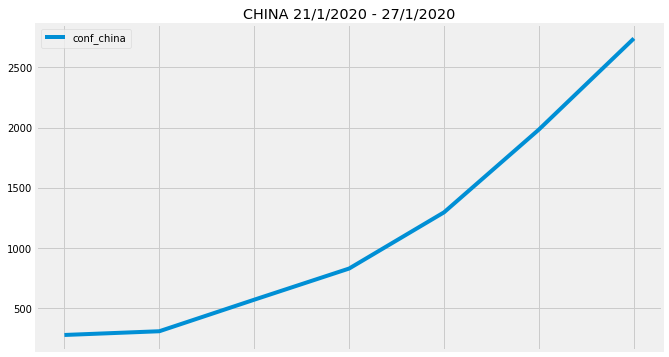

In [118]:
df.loc["1/21/2020":"1/27/2020"].plot(figsize=(10,6), y='conf_china', title="CHINA 21/1/2020 - 27/1/2020")

# week-2

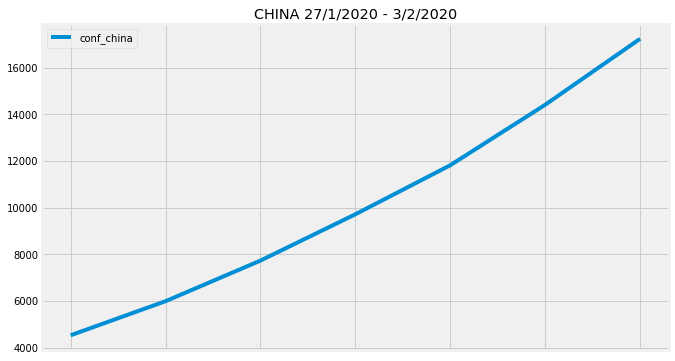

In [122]:
df.loc["1/28/2020":"2/3/2020"].plot(figsize=(10,6), y='conf_china', title="CHINA 27/1/2020 - 3/2/2020")

# Week 3

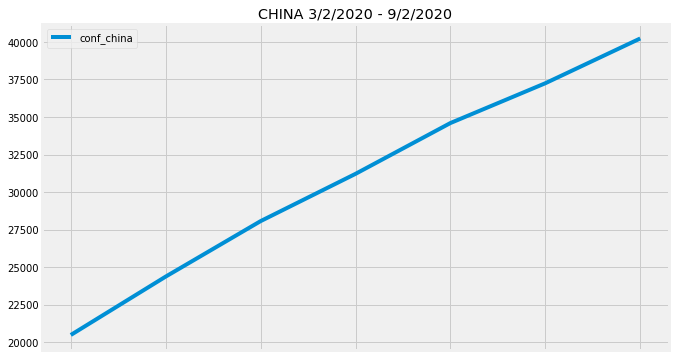

In [123]:
df.loc["2/4/2020":"2/10/2020"].plot(figsize=(10,6), y='conf_china', title="CHINA 3/2/2020 - 9/2/2020")

# week 4

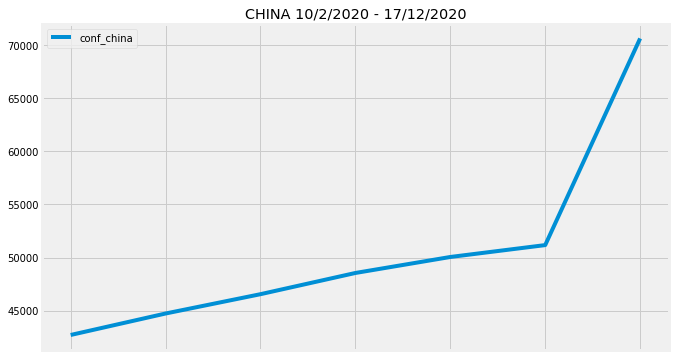

In [124]:
df.loc["2/11/2020":"2/17/2020"].plot(figsize=(10,6), y='conf_china', title="CHINA 10/2/2020 - 17/12/2020")

# week 5

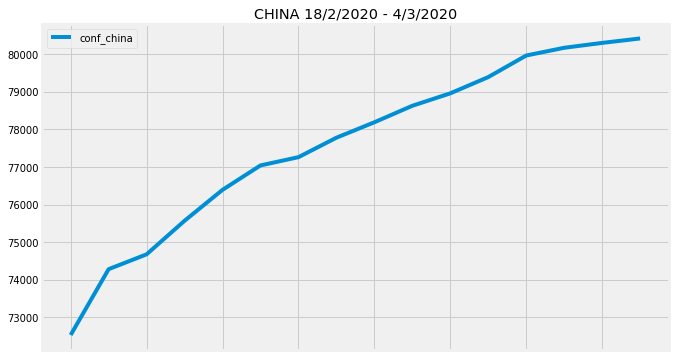

In [129]:
df["2/18/2020":"3/4/2020"].plot(figsize=(10,6), y='conf_china', title="CHINA 18/2/2020 - 4/3/2020")

# week 1-5

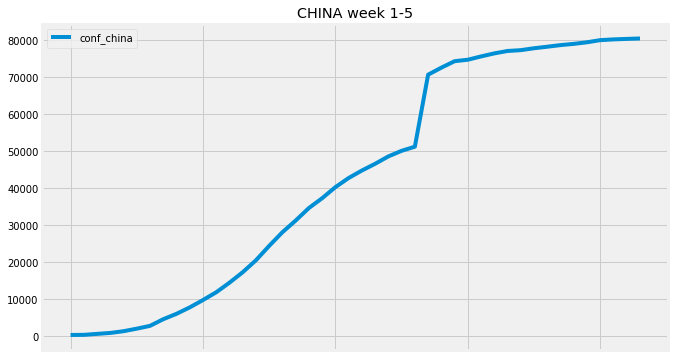

In [130]:
df["1/21/2020":"3/4/2020"].plot(figsize=(10,6), y='conf_china', title="CHINA week 1-5")

### Conclusion:

In [ ]:
"""21, January is begining of week-1.
Lockdown began on 22, January.

week 0-1 ~2700
week 0-2 ~16500 (~13800 new cases in next 7 days)
week 0-3 ~40000 (~23500 new cases in next 7 days)
week 0-4 ~70000 (~30000 new cases in next 7 days)
week 0-5 ~80000
week 5 >  china contained

During lockdown period increase in corona positive
cases is very high (specially in week 3,4)."""